# Analysis of stress granule morphology, localization

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import site
site.addsitedir('./') 

In [8]:
from sganalysis import SGA
import numpy as np
filelist = '/media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/filelist.csv'
sga = SGA(filelist)
img = sga.get_image(10)
cells = sga.segment_cells(img)        
nuclei = sga.segment_nuclei(img)
granules = sga.segment_granules(img)
other = sga.segment_other(img)


/media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/FXR1/U2OS As Z 1 position FXR1 WGA_serie_0001.tif
2021-10-26 13:09:21,494 [INFO] >>>> using CPU
2021-10-26 13:09:21,574 [INFO] ~~~ FINDING MASKS ~~~
2021-10-26 13:09:30,727 [INFO] >>>> TOTAL TIME 9.15 sec
2021-10-26 13:09:30,734 [INFO] >>>> using CPU
2021-10-26 13:09:30,785 [INFO] ~~~ FINDING MASKS ~~~
2021-10-26 13:09:38,030 [INFO] >>>> TOTAL TIME 7.25 sec


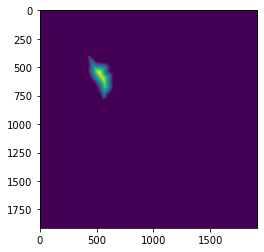

In [120]:
from sganalysis import SGA 
rois = measure.regionprops(cells,np.moveaxis(img,0,2))
a,b = sga.measure_objects_in_cell(rois[21], img, cells, nuclei, granules, other)


In [5]:
import numpy as np
stack = np.concatenate((img,np.expand_dims(cells,0), np.expand_dims(nuclei,0), np.expand_dims(granules,0), np.expand_dims(other,0))).astype(np.uint16)
M = np.array([[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
rgb = np.apply_along_axis(lambda x:M.multiply(x),0,stack)

import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile
tifffile.imsave('tmp.tif',stack,imagej=True, metadata={'axes': 'CYX'})

fig = plt.figure(figsize=(15,15))
plt.imshow(img[1,:,:])
plt.imshow(cells,alpha=0.5,cmap=mpl.cm.tab20)
plt.imshow(nuclei>0,alpha=0.5)
plt.imshow(granules>0,alpha=0.5)
plt.imshow(other>0,alpha=0.5)
plt.axis('off')

AttributeError: 'numpy.ndarray' object has no attribute 'multiply'

False

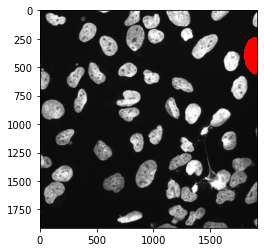

In [112]:
roi = measure.regionprops(cells)
plt.imshow(img[0,:,:],cmap='gray')
plt.plot(roi[16].coords[:,1],roi[16].coords[:,0],'r')

np.all(roi[16].coords[:,1] < img.shape[2]-1)
#roi[16].coords[:,1].max()


(-0.5, 1911.5, 1911.5, -0.5)

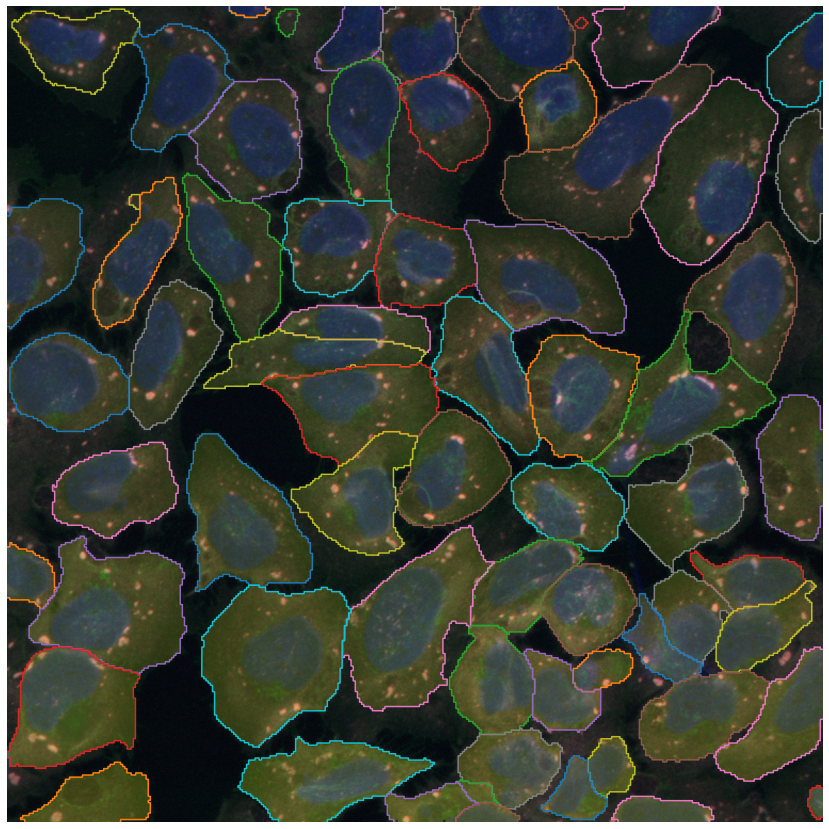

In [23]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
levels = np.unique(cells)
contours=[]
for l in levels:    
    contours.append( measure.find_contours(cells, l,) )

stack = np.concatenate((np.sqrt(img),np.expand_dims(cells,0), np.expand_dims(nuclei,0), np.expand_dims(granules,0), np.expand_dims(other,0))).astype(np.uint16)
for i in range(stack.shape[0]):
    plane = stack[i,:,:] 
    stack[i,:,:] = 255 * (plane - plane.min()) / (plane.max() - plane.min())
M = np.array([[0,0,1,1,0.5,0,1,0],[0,0.7,0,1,0.5,0,0,0],[0.7,0,0,1,0,0,0,0]])
rgb = np.apply_along_axis(lambda x:np.matmul(M,x),0,stack)
rgb = (255 * (rgb - rgb.min()) / (rgb.max() - rgb.min())).astype(int)
fig = plt.figure(figsize=(15,15))
plt.imshow(np.moveaxis(rgb,0,2))
for c in contours:
    plt.plot(c[0][:,1],c[0][:,0])
plt.axis('off')


1


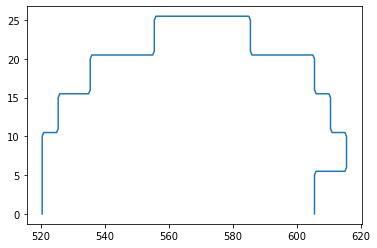

In [48]:
contours = measure.find_contours(cells==1, 0.5) 
print(len(contours))
for c in contours:
    plt.plot(c[:,1],c[:,0])

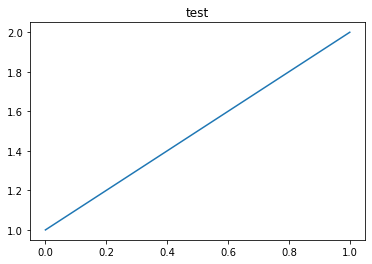

In [47]:
import io
from PIL import Image
import matplotlib.pyplot as plt
plt.ioff()
plt.figure()
plt.plot([1, 2])
plt.title("test")
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
im = Image.open(buf)
#im.show()
buf.close()


In [53]:
from sganalysis import SGA
a,b,c = sga.measure(img, cells, nuclei, granules, other)

(-0.5, 1911.5, 1911.5, -0.5)

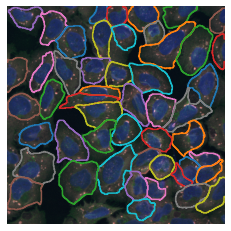

In [64]:
from sganalysis import SGA
visu = sga.render_image(img)
plt.imshow(visu)
for cc in c:
    plt.plot(cc[0][:,1],cc[0][:,0])
plt.axis('off')

In [4]:
from sganalysis import SGA
filelist = '/media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/filelist.csv'
sga = SGA(filelist)
granules_stats, cells_stats = sga.process(7)


/media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/CAPRIN/U2OS As Z CAPRIN Positions CAPRIN WGA_serie_0003MIP.tif
2021-10-25 14:17:02,033 [INFO] >>>> using CPU
2021-10-25 14:17:02,100 [INFO] ~~~ FINDING MASKS ~~~
2021-10-25 14:17:11,329 [INFO] >>>> TOTAL TIME 9.23 sec
uint64
2021-10-25 14:17:11,335 [INFO] >>>> using CPU
2021-10-25 14:17:11,388 [INFO] ~~~ FINDING MASKS ~~~
2021-10-25 14:17:18,627 [INFO] >>>> TOTAL TIME 7.24 sec


/home/jeromeb/work/code/cellpose-test/sganalysis.py:100: RuntimeWarning: invalid value encountered in ulong_scalars
  "Particle ID": [int(x.label) for x in regions],


In [192]:
cells_stats

,Number of Ganules in Cell,Cell Area,Colocalization Spearman Granule:Other,Colocalization Pearson Granule:Other,Mean Intensity in Cytosol [Granule],Mean Intensity in Cytosol [Other],Total Intensity in Cytosol [Granule],Total Intensity in Cytosol [Other],Cell ID,Condition,Filename,File ID
1,7,21611,-0.002808,0.015805,18.854861,43.468618,4.074724e+05,9.394003e+05,1,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
2,2,10580,0.408523,0.228227,5.780421,24.074113,6.115685e+04,2.547041e+05,2,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
3,5,44035,0.480736,0.221685,13.312102,33.620962,5.861984e+05,1.480499e+06,3,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
4,8,44920,0.342469,0.140583,13.024990,39.904201,5.850825e+05,1.792497e+06,4,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
5,7,67630,0.376212,0.187738,8.630756,23.819327,5.836980e+05,1.610901e+06,5,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
6,6,58895,0.428082,0.217676,8.811569,28.050232,5.189574e+05,1.652018e+06,6,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
7,6,60225,0.304159,0.154942,8.493452,22.858413,5.115181e+05,1.376648e+06,7,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
8,6,65865,0.361509,0.162980,10.850758,32.088110,7.146852e+05,2.113483e+06,8,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
9,0,8875,0.365319,0.327171,7.724813,40.739811,6.855771e+04,3.615658e+05,9,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
10,3,41200,0.387730,0.166386,12.554311,42.656737,5.172376e+05,1.757458e+06,10,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1


In [ ]:
index = 1
#res = sga.process(1)
img = sga.get_image(index)
cells = sga.segment_cells(img)        
nuclei = sga.segment_nuclei(img)
granules = sga.segment_granules(img)
#sga.measure(img,cells,nuclei,granules)

AttributeError: '<class 'skimage.measure._regionprops.RegionProperties'>' object has no attribute 'coods'

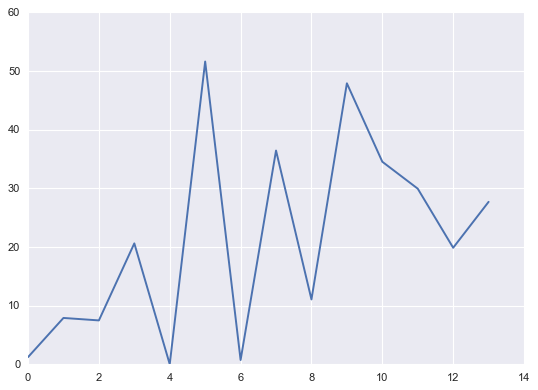

In [167]:
id = 21
import numpy as np
import matplotlib.pyplot as plt
import edt
#from scipy.ndimage.morphology import distance_transform_edt
from skimage.measure import label, regionprops

rois = regionprops(cells,intensity_image=nuclei)
rois = [x for x in rois if x.area > 20]
roi = rois[id]
#mask = (cells == id) * (nuclei > 0) 
#cytosol_only = (cells==id) * (1- (granules > 0)) * (1- (nuclei > 0))

#for k in range(len(rois)):
#    #d = sga.get_distance_to_nuclei(cells,nuclei,k)
#    d = distance_transform_edt( (cells == id) * (nuclei > 0))
#    if np.isnan(d).any() > 0 or np.isinf(d).any():
#        print(k)

#d = distance_transform_edt( (cells == id) * (nuclei > 0))
d = sga.get_distance_to_nuclei(cells,nuclei,id)
distance = regionprops(granules * (cells==id), d)
#plt.imshow((edt.edt(mask) - edt.edt(1 - mask)) * (cells==id))
#plt.imshow(d)
#plt.colorbar()
np.isinf(d).any()
#np.sum(np.isnan(d))
#plt.imshow((cells==1))
#plt.imshow(roi.intensity_image)

plt.plot([x.mean_intensity for x in distance ])
roi.coords


In [184]:
x = np.array([[0,1,2],[0,2,3],[1,0,5]])
i = np.array([[1,1,1],[0,1,0],[0,0,0]])


array([0, 1, 2, 2])

In [119]:
from sganalysis import SGA
import numpy as np
granules_stats, cells_stats = sga.measure(img,cells,nuclei,granules)

In [117]:
res

,Cell ID,ID,Mean Intensity in Granule [Granule],Sum Intensity in Granule [Granule],Mean Intensity in Cytosol [Granule],Ratio of Mean Intensity:Cytosol [Granule],Mean Intensity in Granule [Other],Sum Intensity in Granule [Other],Mean Intensity in Cytosol [Other],Ratio of Mean Intensity:Cytosol [Other],Area,Perimeter,Distance to Nuclei,Circularity,Aspect Ratio,Solidity,Roundness
0,1,1.0,187.426230,11433.0,18.854861,9.940472,50.213115,3063.0,43.468618,1.155158,61.0,27.071068,9.573216,1.045993,0.843152,0.953125,0.832526
1,1,4.0,79.200000,396.0,18.854861,4.200508,70.200000,351.0,43.468618,1.614958,5.0,3.000000,1.000000,6.981317,0.000000,1.000000,0.198944
2,1,9.0,113.769231,5916.0,18.854861,6.033947,43.615385,2268.0,43.468618,1.003376,52.0,23.899495,11.596485,1.144026,0.912752,0.962963,0.917192
3,1,14.0,227.560656,69406.0,18.854861,12.069071,50.229508,15320.0,43.468618,1.155535,305.0,81.597980,10.147552,0.575640,0.334160,0.833333,0.294755
4,1,16.0,110.000000,4070.0,18.854861,5.834039,66.405405,2457.0,43.468618,1.527663,37.0,19.899495,5.875026,1.174161,0.937136,0.948718,0.939074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,47,463.0,154.706897,8973.0,13.376787,11.565325,67.000000,3886.0,43.023426,1.557291,58.0,26.242641,2.982759,1.058334,0.766360,0.983051,0.755622
0,48,462.0,225.797357,51256.0,19.806563,11.400128,58.585903,13299.0,34.498245,1.698229,227.0,54.041631,49.473274,0.976740,0.789683,0.957806,0.790188
1,48,465.0,105.821429,5926.0,19.806563,5.342746,35.089286,1965.0,34.498245,1.017132,56.0,26.142136,43.926216,1.029712,0.732880,0.933333,0.732275
2,48,466.0,108.647059,7388.0,19.806563,5.485407,43.279412,2943.0,34.498245,1.254540,68.0,30.142136,72.904068,0.940526,0.549119,0.944444,0.545878


<AxesSubplot:ylabel='Frequency'>

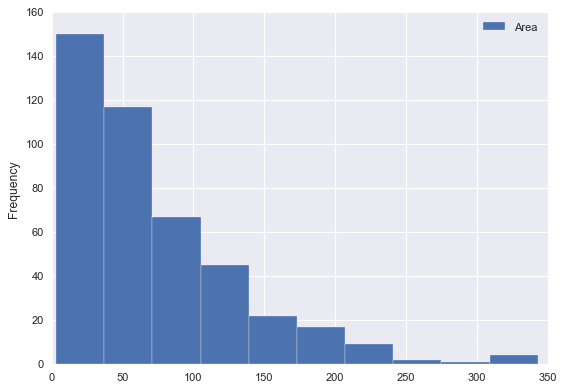

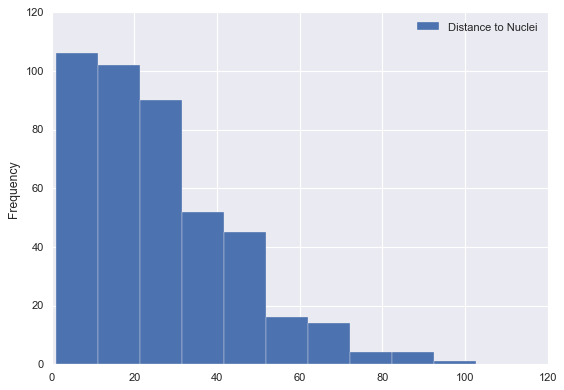

In [146]:
res.plot(y='Area',kind='hist')
res.plot(y='Distance to Nuclei',kind='hist')


In [164]:
cells = pd.read_csv('cells-1.csv')
#cells.plot(x='Cell ID',y='Area')
cells


,Unnamed: 0,Number of Ganules in Cell,Cell Area,Pearson Granule:Other,Cell ID,Condition,Filename,File ID
0,1,6,21611,21611,1,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
1,2,2,10580,10580,2,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
2,3,5,44035,44035,3,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
3,4,8,44920,44920,4,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
4,5,7,67630,67630,5,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
5,6,6,58895,58895,6,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
6,7,6,60225,60225,7,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
7,8,6,65865,65865,8,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
8,9,0,8875,8875,9,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
9,10,3,41200,41200,10,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,1
